In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import pytesseract as pytes
from pytesseract import Output

pytes.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'


In [3]:

text = pytes.image_to_string(Image.open('numbers.png'), lang=None)
text

'123456789\n'

In [4]:
text = pytes.image_to_string(Image.open('sentence.jfif'), lang=None)
print(text)

Rome is not built in a day.

=Ot= oF Oraoll
PHSOiAle RO! OFLIct.



In [5]:
text = pytes.image_to_string(Image.open('sentence.jfif'), lang='kor')
print(text)

0006 15 00} 04111 10ㅁ 8 08.

로마는 하루아침에
만들어지는 껏이 아니다.



In [6]:
def getText(src):
    cv.imwrite('temp.png', src)
    text = pytes.image_to_string(Image.open('temp.png'), lang='kor')
    print(text)

로마는 하루아침에
만들어지는 것이 아니다.



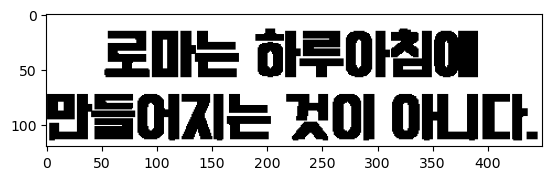

In [7]:
img = cv.imread('./sentence.jfif', 0)

ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
roi = thresh[400:520, 180:630]

kernel = np.ones((2,3), np.uint8)
roi = cv.erode(roi, kernel, iterations = 2)
plt.imshow(roi, cmap='gray')

getText(roi)
roi.shape
img = cv.cvtColor(roi, cv.COLOR_GRAY2RGB)


{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6], 'left': [0, 1, 1, 53, 53, 103, 145, 199, 237, 279, 321, 363, 1, 1, 54, 95, 137, 218, 314], 'top': [0, 14, 14, 14, 16, 16, 16, 14, 16, 16, 14, 16, 73, 73, 69, 69, 73, 73, 73], 'width': [450, 445, 445, 339, 41, 17, 26, 32, 33, 33, 29, 29, 445, 203, 42, 43, 67, 80, 132], 'height': [120, 101, 101, 44, 42, 42, 42, 44, 42, 42, 44, 42, 42, 42, 51, 51, 42, 42, 42], 'conf': [-1, -1, -1, -1, 91, 92, 93, 93, 93, 40, 91, 68, -1, 92, 90, 74, 96, 90, 53], 'text': ['', '', '', '', '로', '마', '는', '하', '루', '아', '침', '에', '', '만', '들', '어', '지는', '것이', '아니다.']}


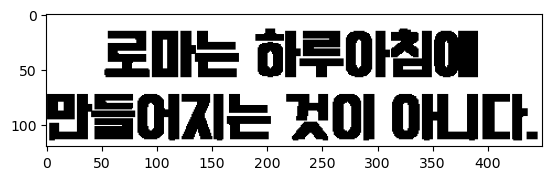

In [8]:
img = cv.imread('./sentence.jfif', 0)

ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
roi = thresh[400:520, 180:630]

kernel = np.ones((2,3), np.uint8)
roi = cv.erode(roi, kernel, iterations = 2)
plt.imshow(roi, cmap='gray')

results = pytes.image_to_data(roi, output_type=Output.DICT, lang='kor')
print(results)

180 400 450 120
181 414 445 101
181 414 445 101


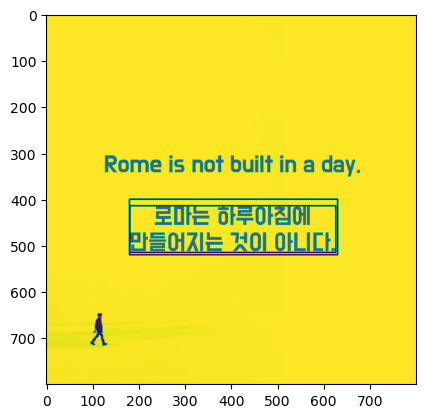

In [9]:
img = cv.imread('./sentence.jfif', 0)

ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
roi = thresh[400:520, 180:630]
kernel = np.ones((2,3), np.uint8)
roi = cv.erode(roi, kernel, iterations = 2)
plt.imshow(roi, cmap='gray')

results = pytes.image_to_data(roi, output_type=Output.DICT, lang='kor')

for i in range(0, len(results['text'])):
    
    x = results["left"][i] 
    y = results["top"][i] 
    w = results["width"][i] 
    h = results["height"][i]
    text = results["text"][i]
    
    y = y + 400
    x = x + 180
    
    if w > 400 and h > 100:
        cv.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
        print(x, y, w, h)

plt.imshow(img)

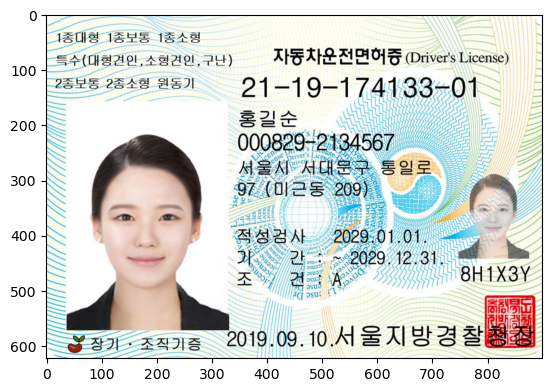

In [10]:
img = cv.imread('./drive.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
# getText로 문자를 인식한 후, 오류가 있다면 오류를 개선할 수 있게 이미지 전처리


# image_to_data 함수를 사용해서 주민번호에 해당하는 부분 바운딩 박스 그리기


# 주민번호 뒷자리에서 성별 부분 빼고 초록색으로 색칠
#  000829-2134567 ->>>   000829-2[-----]


In [13]:
# getText로 문자를 인식한 후, 오류가 있다면 오류를 개선할 수 있게 이미지 전처리

img = cv.imread('./drive.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

getText(gray)

2019.09.10.서울지방경



In [14]:
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
getText(thresh)

소형
자동 차운 전면 허 증 (027605 106056)

번인소변.
널                 21-19-174133-01

영

즐기스
종골순




In [15]:
img = cv.imread('./drive.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
roi = thresh

kernel = np.ones((3,2), np.uint8)
roi = cv.erode(roi, kernel, iterations = 1)
img = cv.cvtColor(roi, cv.COLOR_GRAY2RGB)

getText(img)

1종대형 1종보통 1종소령
특수(대형견인,소형견인,구나) 자롱차운전면허픔(007678 106056)

2606 2649 052  21-19-174133-01

흠길순
000829-2134567
서울시 서대문구 통일로

97 (미근동 209) .          / ^

~ 「. :깅
_ , 혀성검시 2029.01. 01.
~   가. ㆍ 간 : ~9009.12.81. 때 노
마1%3

제 …

뼈'  늘 가니
할 장기ㆍ조지기 2019.09.10.서울지방경 배




000829-2134567 284 47


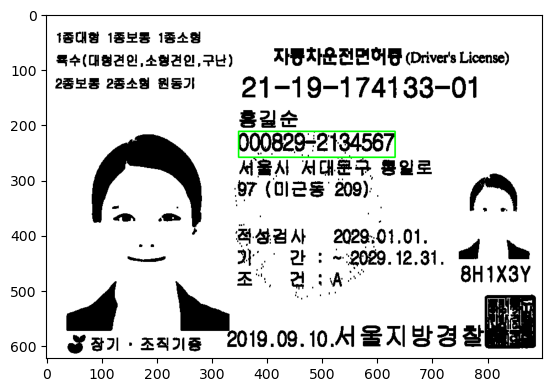

In [17]:
img = cv.imread('./drive.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
roi = thresh

kernel = np.ones((3,2), np.uint8)
roi = cv.erode(roi, kernel, iterations = 1)
img = cv.cvtColor(roi, cv.COLOR_GRAY2RGB)

results = pytes.image_to_data(roi, output_type=Output.DICT, lang='kor')

for i in range(0, len(results["text"])):
    # extract the bounding box coordinates of the text region from
    # the current result
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]
    # extract the OCR text itself along with the confidence of the
    # text localization
    text = results["text"][i]
    #conf = int(results["conf"][i])
    
    
    if w/h > 6 and w/h < 6.2 and text:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(text, w, h)
    
plt.imshow(img)